In [1]:
import lasagne
import spatial_vae
reload(spatial_vae)
from spatial_vae import test_network

import spatial_smooth_vae
reload(spatial_smooth_vae)
from spatial_smooth_vae import test_network as test_smooth_net

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
%matplotlib inline

Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: GeForce GTX 980 (CNMeM is disabled)


In [2]:
n_fp = 16;

In [57]:
pred, actual, fp, imgs = test_network(weights_file='params_211088.390625.npz',get_fp=True)
pred_imgs = np.reshape(pred, (pred.shape[0],60,60))
actual_imgs = np.reshape(actual, (actual.shape[0],60,60))
imgs = np.uint8(np.transpose(imgs, (0,2,3,1)))
fps = np.reshape((fp+1)*240/2, (imgs.shape[0], n_fp, 2))

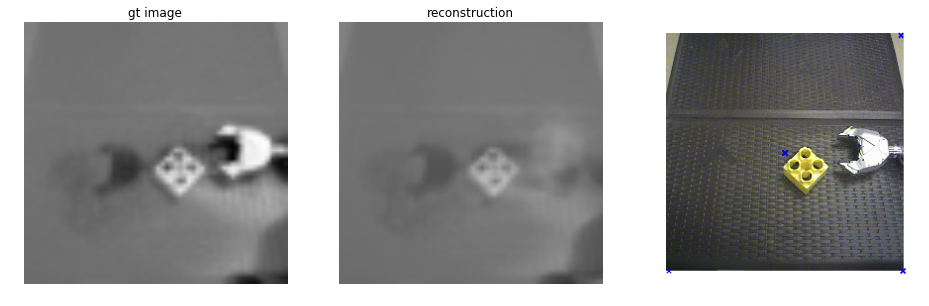

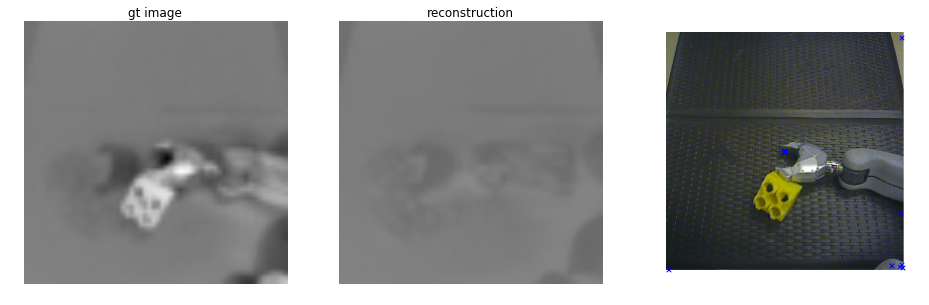

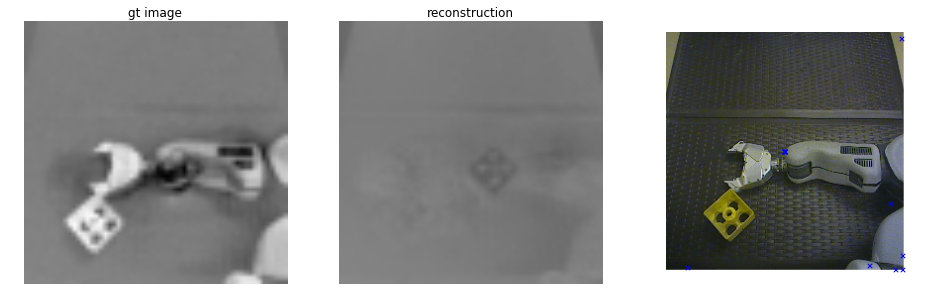

In [58]:
idx = [0,115,240]
plt.clf()
print('Example reconstructions')

for i in idx:
    vmin = min(pred_imgs[i].min(), actual_imgs[i].min())
    vmax = max(pred_imgs[i].max(), actual_imgs[i].max())
    
    plt.figure(figsize=(16,5));
    plt.subplot(1,3,1)
    plt.imshow(actual_imgs[i], cmap = cm.Greys_r, vmin=vmin, vmax=vmax)
    plt.title('gt image'); plt.axis('off')
    
    plt.subplot(1,3,2)
    plt.imshow(pred_imgs[i], cmap = cm.Greys_r, vmin=vmin, vmax=vmax)
    plt.title('reconstruction'); plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(imgs[i]);
    plt.hold(True); plt.axis('off')
    plt.scatter(fps[i,:,0], fps[i,:,1], marker='x')

In [43]:
 fps[0]

array([[ 222.10862732,  120.08177185],
       [ 120.        ,  120.00006866],
       [ 120.        ,  120.00006866],
       [ 239.1427002 ,    0.85971594],
       [ 232.65475464,    7.45488882],
       [ 120.        ,  120.00006866],
       [ 120.        ,  120.00006866],
       [ 239.1872406 ,    0.85176229],
       [   0.46013832,  239.63830566],
       [ 120.        ,  120.00006866],
       [ 120.        ,  120.00006866],
       [ 120.        ,  120.00006866],
       [ 120.        ,  120.00006866],
       [ 239.98709106,    4.44158792],
       [ 239.44827271,  230.85646057],
       [ 120.        ,  120.00006866]], dtype=float32)

In [3]:
pred, actual, fp, imgs = test_smooth_net(output_dir='svae_ricebowl_var0.1_2/', get_fp=True)

Loading data...
Building model and compiling functions...

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR:theano.gof.opt:Optimization failure due to: constant_folding
ERROR (theano.gof.opt): TRACEBACK:
ERROR:theano.gof.opt:TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1484, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5064, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 807, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 733, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1065, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1007, in __compile__
    keep_lock=keep_lock)
  File "


L = 4, z_dim = 32


OSError: [Errno 12] Cannot allocate memory

In [83]:
pred = np.concatenate(pred, axis=0)
actual = np.concatenate(actual, axis=0)
fp = np.concatenate(fp, axis=0)
#imgs = np.concatenate(imgs, axis=0)

In [89]:
fps = np.reshape((fp+1)*240/2, (fp.shape[0], n_fp, 2))

In [90]:
pred_imgs = np.reshape(pred, (pred.shape[0],60,60))
actual_imgs = np.reshape(actual, (actual.shape[0],60,60))
imgs = np.uint8(np.transpose(imgs, (0,2,3,1)))

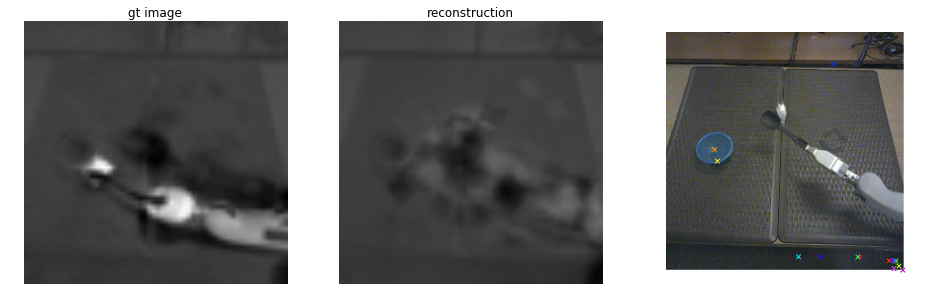

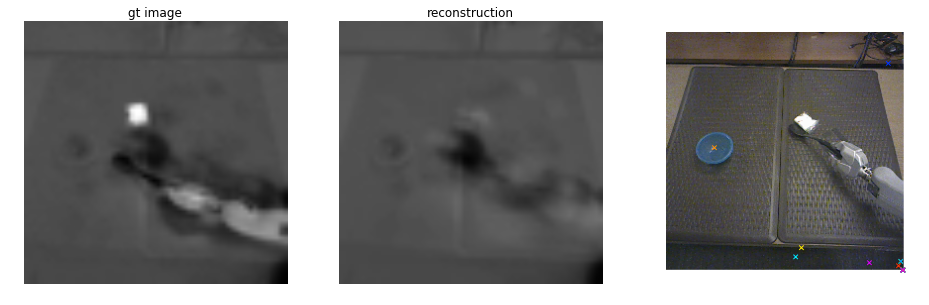

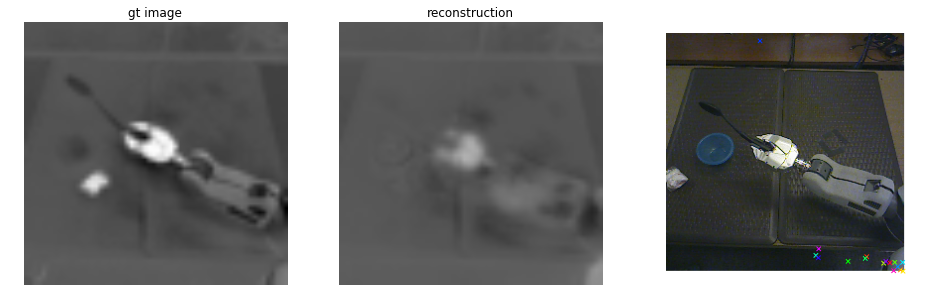

In [107]:
idx = [105,15,-1]
plt.clf()

for i in idx:
    vmin = min(pred_imgs[i].min(), actual_imgs[i].min())
    vmax = max(pred_imgs[i].max(), actual_imgs[i].max())
    
    plt.figure(figsize=(16,5));
    plt.subplot(1,3,1)
    plt.imshow(actual_imgs[i], cmap = cm.Greys_r, vmin=vmin, vmax=vmax)
    plt.title('gt image'); plt.axis('off')
    
    plt.subplot(1,3,2)
    plt.imshow(pred_imgs[i], cmap = cm.Greys_r, vmin=vmin, vmax=vmax)
    plt.title('reconstruction'); plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(imgs[i]);
    plt.hold(True); plt.axis('off')
    plt.scatter(fps[i,:,0], fps[i,:,1], marker='x', c=np.array(range(n_fp))/float(n_fp), cmap=cm.gist_rainbow)

In [101]:
fps.shape

(475, 16, 2)

In [102]:
imgs.shape

(490, 240, 240, 3)